In [2]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
N, D, H= 64 ,1000, 100
x=tf.placeholder(tf.float32, shape=(N,D))
y=tf.placeholder(tf.float32, shape=(N,D))
w1=tf.Variable(tf.random_normal((D,H)))
w2=tf.Variable(tf.random_normal((H,D)))
h=tf.maximum(tf.matmul(x,w1),0)
y_pred=tf.matmul(h,w2)
diff=y_pred-y
loss=tf.reduce_mean(tf.reduce_sum(diff**2,axis=1))
grad_w1,grad_w2=tf.gradients(loss,[w1,w2])
r=0.99
learning_rate=1e-3
vx_1=0
vx_2=0
vx_1=r*vx_1-(learning_rate*grad_w1)
vx_2=r*vx_2-(learning_rate*grad_w2)
x_w1=w1+vx_1
x_w2=w2+vx_2
new_w1=w1.assign(x_w1)
new_w2=w2.assign(x_w2)
updates=tf.group(new_w1,new_w2)


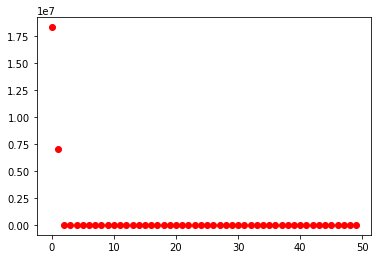

7020100.5 332.08282


In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.rand (N, D), y: np.random.rand (N, D)}
    step = 50
    loss_summary = []
    for i in range(step):
        out, _ = sess.run([loss, updates], feed_dict=values)
        loss_summary.append(out )
    plt.plot(range(step), loss_summary, 'ro', label='loss_val')
    plt.show()
    print(loss_summary[1],loss_summary[step-1])